Play Outside: 50.00


K:\anaconda\envs\neural_network\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


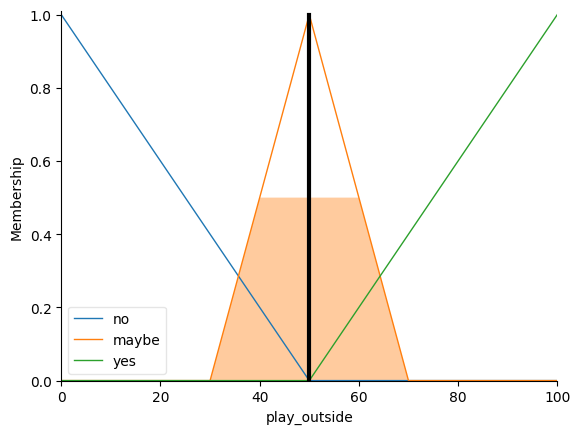

In [1]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
# Define the input and output variables
temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
play_outside = ctrl.Consequent(np.arange(0, 101, 1), 'play_outside')
# Define fuzzy membership functions for temperature
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['warm'] = fuzz.trimf(temperature.universe, [15, 25, 35])
temperature['hot'] = fuzz.trimf(temperature.universe, [30, 40, 40])
# Define fuzzy membership functions for humidity
humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['high'] = fuzz.trimf(humidity.universe, [60, 100, 100])
# Define fuzzy membership functions for play outside
play_outside['no'] = fuzz.trimf(play_outside.universe, [0, 0, 50])
play_outside['maybe'] = fuzz.trimf(play_outside.universe, [30, 50, 70])
play_outside['yes'] = fuzz.trimf(play_outside.universe, [50, 100, 100])
# Define the rules
rule1 = ctrl.Rule(temperature['cold'] & humidity['high'], play_outside['no'])
rule2 = ctrl.Rule(temperature['warm'] & humidity['medium'], play_outside['maybe'])
rule3 = ctrl.Rule(temperature['hot'] & humidity['low'], play_outside['yes'])
# Create the control system
play_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
play = ctrl.ControlSystemSimulation(play_ctrl)
# Pass inputs to the system
play.input['temperature'] = 25
play.input['humidity'] = 40
# Compute the result
play.compute()
print(f"Play Outside: {play.output['play_outside']:.2f}")
play_outside.view(sim=play)

In [4]:
tree = [
    [[5, 1, 2], [8, -8, -9]],
    [[9, 4, 5], [-3, 4, 3]]
]  # Tree to search
root = 0  # Root depth
pruned = 0  # Times pruned

# Function to search tree
def children(branch, depth, alpha, beta):
    global root  # Global root depth to compare with current depth
    global pruned  # Global times pruned to count times pruned
    i = 0  # Index of child
    for child in branch:
        if type(child) is list:  # If child is a list, call children function recursively
            (nalpha, nbeta) = children(child, depth + 1, alpha, beta)
            if depth % 2 == 1:
                beta = min(beta, nalpha)
            else:
                alpha = max(alpha, nbeta)
            branch[i] = nalpha if depth % 2 == 0 else nbeta
            i += 1
        else:
            if depth % 2 == 0 and alpha < child:
                alpha = child
            if depth % 2 == 1 and beta > child:
                beta = child
            if alpha >= beta:
                pruned += 1
                break
    return (alpha, beta)

# Function to call search
def alphabeta(branch=tree, depth=root, alpha=-15, beta=15):
    global pruned
    (alpha, beta) = children(branch, depth, alpha, beta)
    if depth == root:
        best_move = max(branch) if depth % 2 == 0 else min(branch)
        print("(alpha, beta): ", alpha, beta)
        print("Result: ", best_move)
        print("Times pruned: ", pruned)
    return (alpha, beta, branch, pruned)

if __name__ == "__main__":
    alphabeta()


(alpha, beta):  5 15
Result:  5
Times pruned:  1


In [5]:
def dfs(graph, start):
    visited = set()
    stack = [start]
    
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            print(vertex, end=" ")
            stack.extend(set(graph[vertex]) - visited)
    return visited

# Example usage:
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

dfs(graph, 'A')


A C F B E D 

{'A', 'B', 'C', 'D', 'E', 'F'}

In [6]:
from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])
    
    while queue:
        vertex = queue.popleft()
        if vertex not in visited:
            visited.add(vertex)
            print(vertex, end=" ")
            queue.extend(set(graph[vertex]) - visited)
    return visited

# Example usage:
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

bfs(graph, 'A')


A B C D E F 

{'A', 'B', 'C', 'D', 'E', 'F'}

In [7]:
from queue import PriorityQueue

def a_star(graph, start, goal):
    open_list = PriorityQueue()
    open_list.put((0, start))
    came_from = {}
    g_score = {node: float('inf') for node in graph}
    g_score[start] = 0
    f_score = {node: float('inf') for node in graph}
    f_score[start] = heuristic(start, goal)

    while not open_list.empty():
        current = open_list.get()[1]

        if current == goal:
            return reconstruct_path(came_from, current)

        for neighbor in graph[current]:
            tentative_g_score = g_score[current] + graph[current][neighbor]

            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)
                open_list.put((f_score[neighbor], neighbor))

    return None

def heuristic(a, b):
    # Example heuristic function (Manhattan distance)
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def reconstruct_path(came_from, current):
    total_path = [current]
    while current in came_from:
        current = came_from[current]
        total_path.append(current)
    return total_path[::-1]

# Example usage:
graph = {
    (0, 0): {(0, 1): 1, (1, 0): 1},
    (0, 1): {(0, 0): 1, (1, 1): 1},
    (1, 0): {(0, 0): 1, (1, 1): 1},
    (1, 1): {(0, 1): 1, (1, 0): 1}
}
start = (0, 0)
goal = (1, 1)

path = a_star(graph, start, goal)
print("Path found:", path)


Path found: [(0, 0), (0, 1), (1, 1)]
